## COCO Whole Body
anns: https://github.com/jin-s13/COCO-WholeBody/tree/master?tab=readme-ov-file

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import os
import requests

In [3]:
dataDir='../data/example_mscoco/'
dataType='val2017'
annFile='../data/annotations/coco_wholebody_val_v1.0.json'.format(dataDir,dataType)

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.28s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [6]:

# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [7]:
coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])

[{'license': 4,
  'file_name': '000000002473.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000002473.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-20 04:16:17',
  'flickr_url': 'http://farm5.staticflickr.com/4027/4377710907_7b97c2464d_z.jpg',
  'id': 2473}]

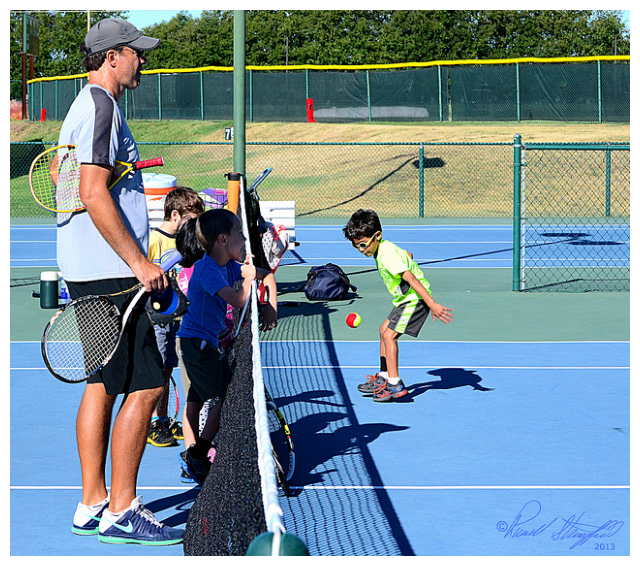

In [8]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

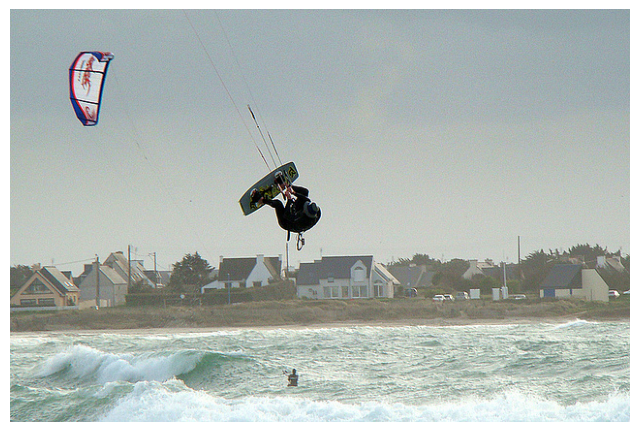

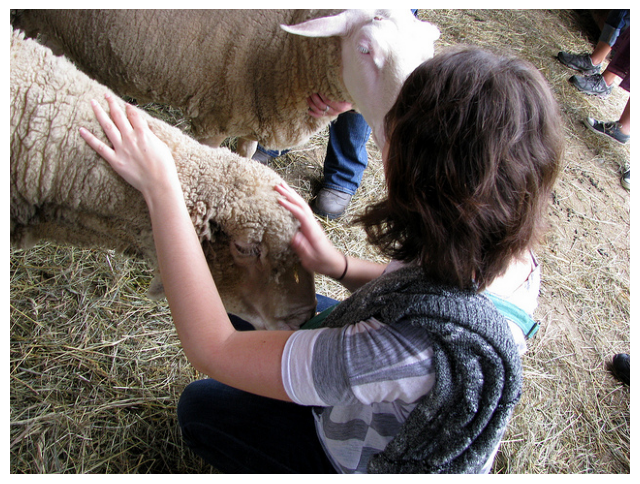

In [9]:
for id in imgIds[:2]:
    img = coco.loadImgs(id)[0]
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    plt.show()

In [11]:
def download_images():
    for id in imgIds:
        img = coco.loadImgs(id)[0]
        url = img['coco_url']
        try:
            response = requests.get(url, stream=True)
            response.raise_for_status()

            with open(catDir + img['file_name'], 'wb') as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)

            print(f"Image saved successfully at {catDir + img['file_name']}")

        except requests.exceptions.RequestException as e:
            print(f"Error downloading image from {url}: {e}")


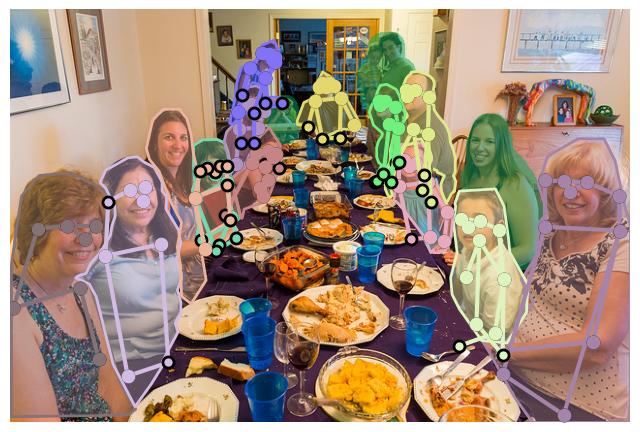

In [47]:
18380
img = coco.loadImgs(18380)[0]
url = img['coco_url']
I = io.imread(url)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=18380, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

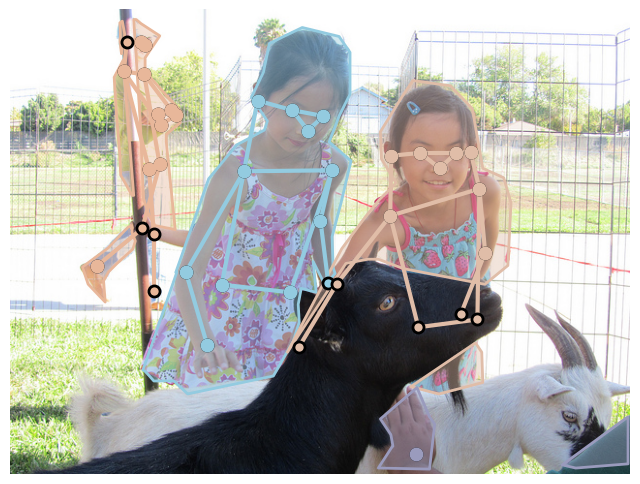

In [43]:
img = coco.loadImgs(8690)[0]
url = img['coco_url']
I = io.imread(url)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=8690, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)


In [40]:
anns[0]['iscrowd']

0

8

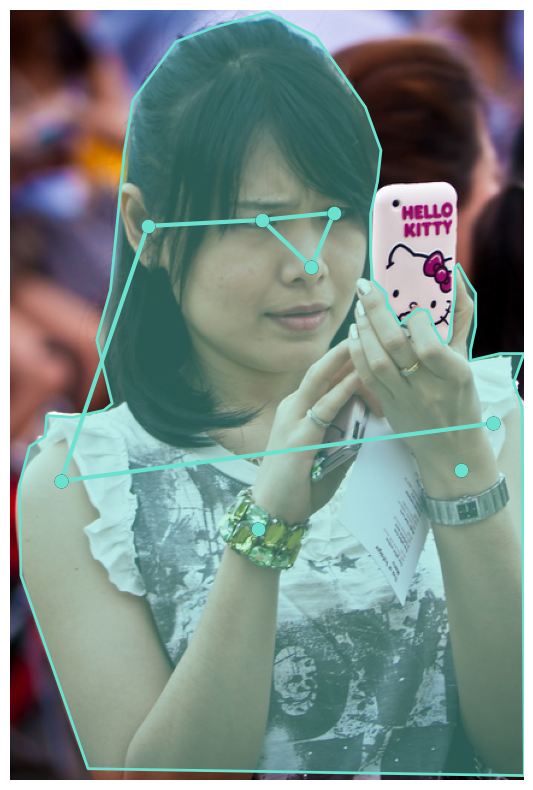

In [34]:
img = coco.loadImgs(1296)[0]
url = img['coco_url']
I = io.imread(url)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=1296, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns([anns[0]])
anns[0].keys()
anns[0]['num_keypoints']

In [12]:
anns[0].keys()

dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id', 'face_box', 'lefthand_box', 'righthand_box', 'lefthand_kpts', 'righthand_kpts', 'face_kpts', 'face_valid', 'lefthand_valid', 'righthand_valid', 'foot_valid', 'foot_kpts'])

In [35]:
anns[0]['iscrowd']

0

In [14]:
import cv2
img = coco.loadImgs(1296)[0]
url = img['coco_url']
I = io.imread(url)
annIds = coco.getAnnIds(imgIds=1296, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)


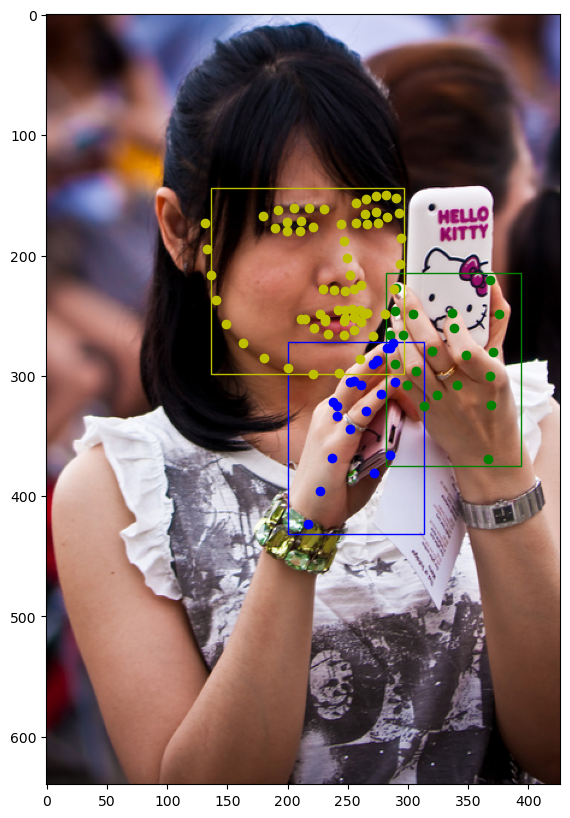

In [15]:
from matplotlib.patches import Rectangle
# other 11051
fig, ax = plt.subplots(1)
ax.imshow(I)
x, y, w, h = anns[0]['lefthand_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rect)

points = anns[0]['lefthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'go')
    j = j + 3

x, y, w, h = anns[0]['righthand_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)
points = anns[0]['righthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'bo')
    j = j + 3

x, y, w, h = anns[0]['face_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='y', facecolor='none')
ax.add_patch(rect)
points = anns[0]['face_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'yo')
    j = j + 3


plt.show()

63


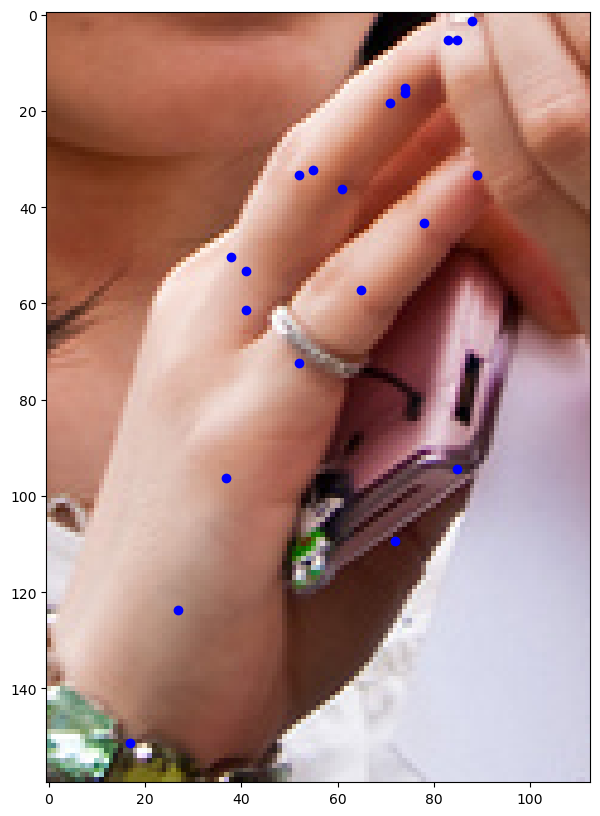

In [24]:
x, y, _w, _h = anns[0]['righthand_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['righthand_kpts']
j = 0
print(len(points))
for i in range(int(len(points)/3)):
    #if points[j+2] > 0.5:
    ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    j = j + 3
plt.show()

63
0.22742959856987
0.2361452877521515
0.2361452877521515
0.40456080436706543
0.3239585757255554
0.3264773190021515
0.6057682037353516
0.6649036407470703
0.44895216822624207
0.407373309135437
0.5409519672393799
0.5014725923538208
0.5953532457351685
0.455422580242157
0.6141000390052795
0.5971620678901672
0.5035480260848999
0.5361166596412659
0.5658991932868958
0.51066654920578
0.38492003083229065


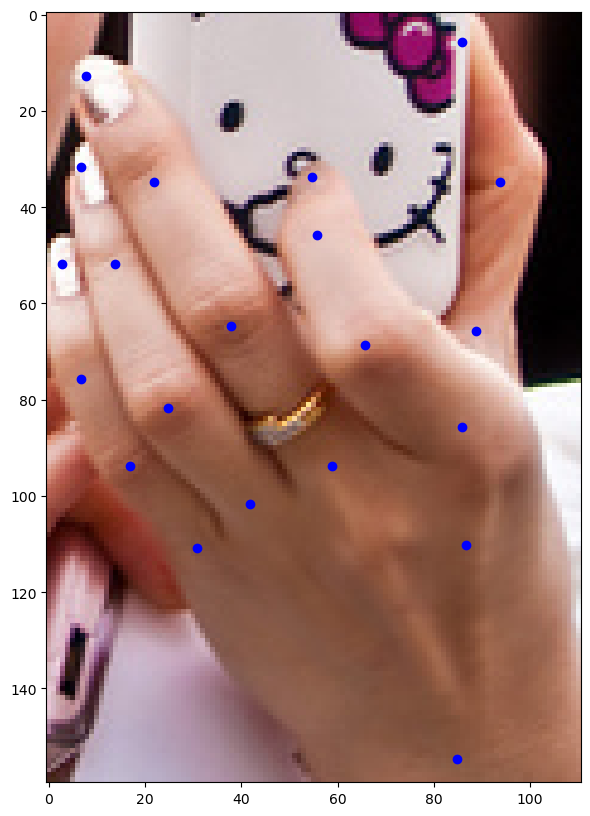

In [22]:
x, y, _w, _h = anns[0]['lefthand_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['lefthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    if points[j+2] > 0.1:
        print(points[j+2])
        ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    j = j + 3
plt.show()


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


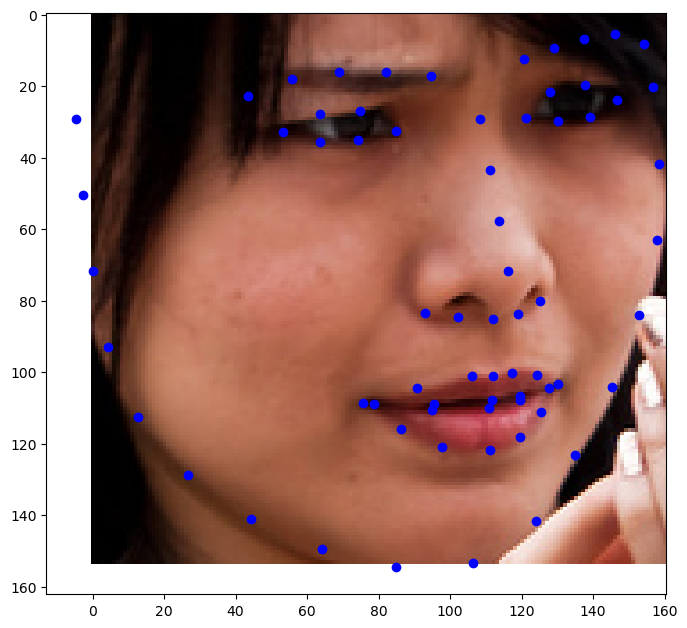

In [18]:
x, y, _w, _h = anns[0]['face_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['face_kpts']
j = 0
for i in range(int(len(points)/3)):
    if points[j+2] > 0.1:
        print(points[j+2])
        ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    j = j + 3
plt.show()


## MPII Single Person Dataset

In [48]:
import scipy.io
import pandas as pd

In [67]:
data_dir = '../data/example_mpII/'
ann_file = '../data/annotations/mpii_dataset.csv'

In [68]:
anns = pd.read_csv(ann_file)

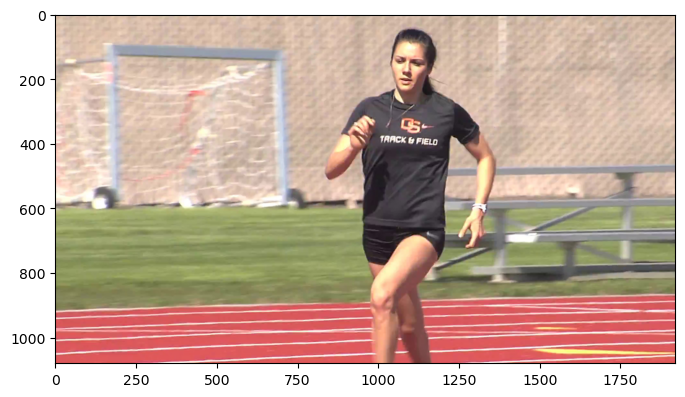

In [71]:
img = '000925252.jpg'
I = plt.imread(data_dir + img)
plt.imshow(I)
plt.show()
annotation = anns[anns['NAME'] == img]

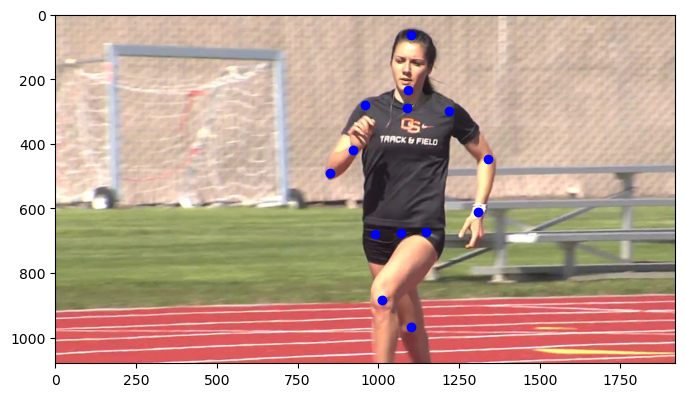

In [102]:
fig, ax = plt.subplots(1)
ax.imshow(I)

for col in annotation.columns:
    if "_X" in col:
        x_coord = annotation[col].values[0]
        y_coord = annotation[col[:-1] + 'Y'].values[0]
        if x_coord != -1 and y_coord != -1:
            ax.plot(x_coord, y_coord, 'bo')


plt.show()

## TRB MPII

In [103]:
data_dir = '../data/example_mpII/'
ann_file = '../data/annotations/MPII_contour_points.json'

In [104]:
import json
with open(ann_file) as f:
    anns = json.load(f)

In [121]:
len(anns)

28883

In [113]:
img = '000925252.jpg'
I = plt.imread(data_dir + img)
annotation = [ann for ann in anns if ann['img_name'] == img][0]

In [117]:
annotation.keys()

dict_keys(['img_name', 'center', 'contour_keypoints'])

right_neck
1054 227
left_neck
1173 233
medial_right_shoulder
953 359
lateral_right_shoulder
918 305
medial_right_bow
884 426
lateral_right_bow
844 512
medial_right_wrist
914 410
lateral_right_wrist
937 430
medial_left_shoulder
1227 376
lateral_left_shoulder
1241 273
medial_left_bow
1306 454
lateral_left_bow
1360 437
medial_left_wrist
1292 596
lateral_left_wrist
1337 606
medial_right_hip
1052 726
lateral_right_hip
953 699
medial_right_knee
1148 987
lateral_right_knee
1066 995
medial_right_ankle
-1 -1
lateral_right_ankle
-1 -1
medial_left_hip
1052 726
lateral_left_hip
1207 703
medial_left_knee
977 892
lateral_left_knee
1059 908
medial_left_ankle
-1 -1
lateral_left_ankle
-1 -1


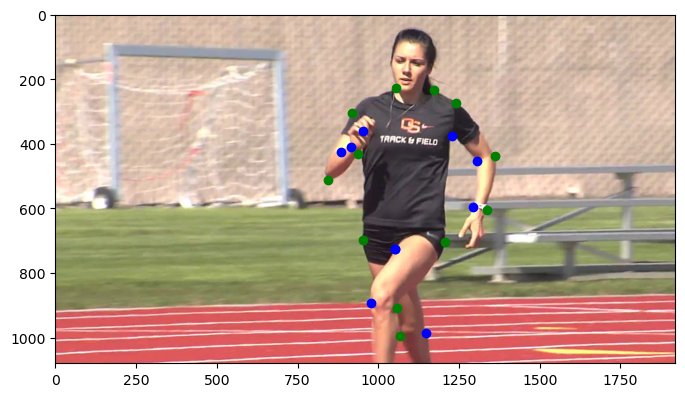

In [120]:
fig, ax = plt.subplots(1)
ax.imshow(I)

for key in annotation['contour_keypoints']:
    print(key)
    x_coord, y_coord = annotation['contour_keypoints'][key]
    print(x_coord, y_coord)
    if x_coord != -1 and y_coord != -1:
            if 'medial' in key:
                ax.plot(x_coord, y_coord, 'bo')
            else:
                 ax.plot(x_coord, y_coord, 'go')

plt.show()